In [6]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [7]:
#Load data
df_raw = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#Preprocessing
df_baking = df_raw.copy()
df_baking['sex'] = df_baking['sex'].astype('category')
df_baking['region'] = df_baking['region'].astype('category')
df_baking['smoker'] = df_baking['smoker'].astype('category')
df_baking['charges'] = np.log(df_baking['charges'])
df = df_baking

In [9]:
#EDA
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((1204, 7), (134, 7))

In [10]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,1204.0,39.181063,14.151788,18.000000,26.000000,39.000000,51.000000,64.000000
bmi,1204.0,30.643800,6.086388,15.960000,26.220000,30.400000,34.717500,53.130000
children,1204.0,1.093854,1.199333,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1204.0,9.103639,0.920947,7.022756,8.464704,9.151006,9.736511,11.063045


,count,unique,top,freq
sex,1204,2,male,604
smoker,1204,2,no,956
region,1204,4,southeast,320


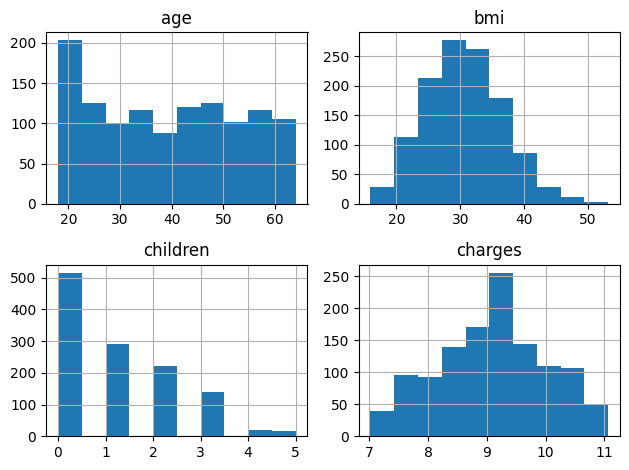

In [11]:
df_train.hist()
plt.tight_layout()
plt.show()

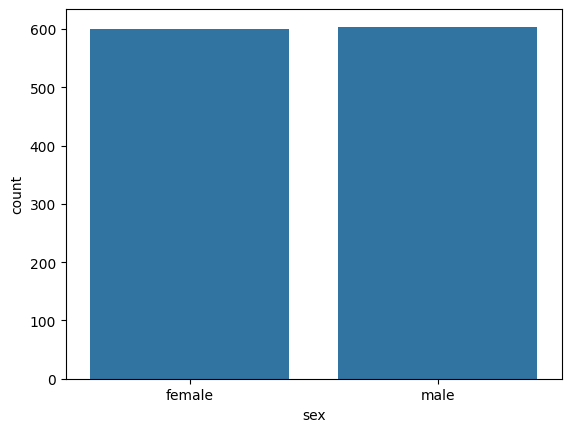

In [12]:
sns.countplot(df_train, x='sex')
plt.show()

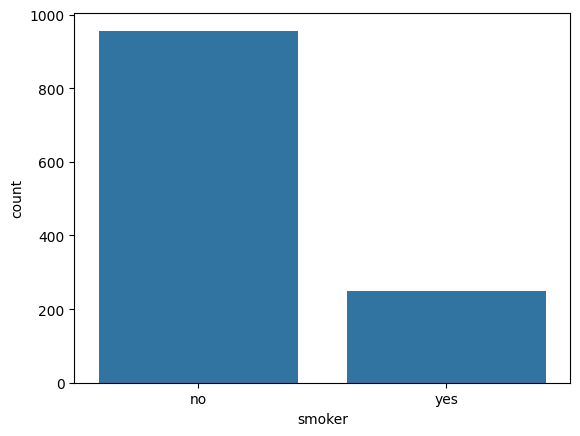

In [13]:
sns.countplot(df_train, x='smoker')
plt.show()

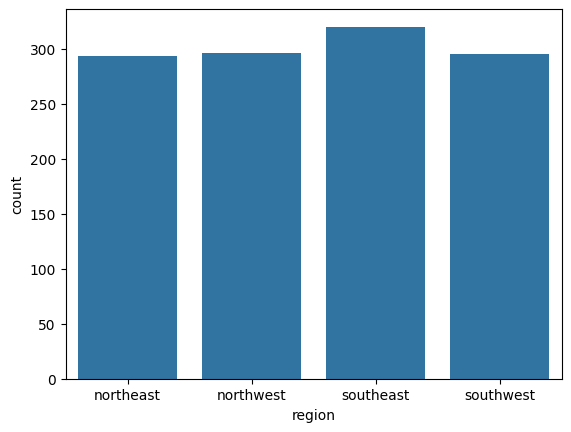

In [14]:
sns.countplot(df_train, x='region')
plt.show()

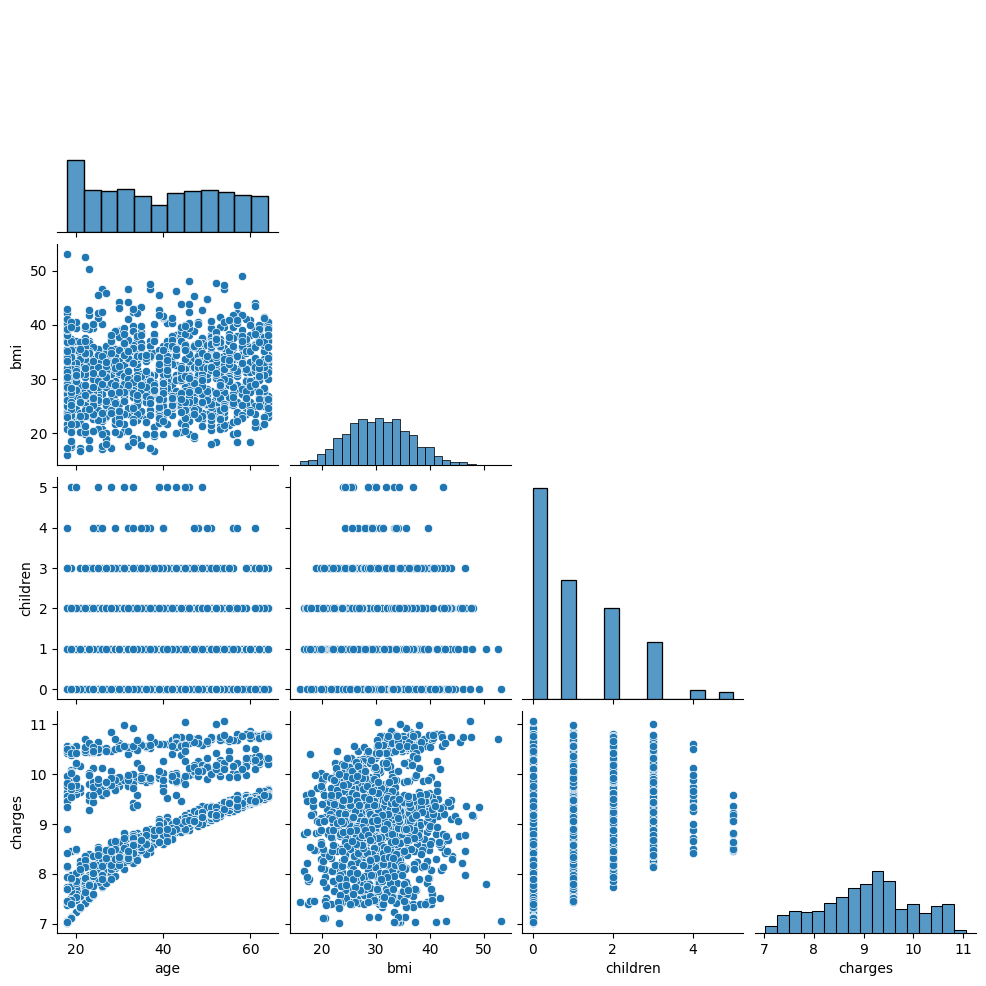

In [15]:
sns.pairplot(data=df_train, corner=True)
plt.show()

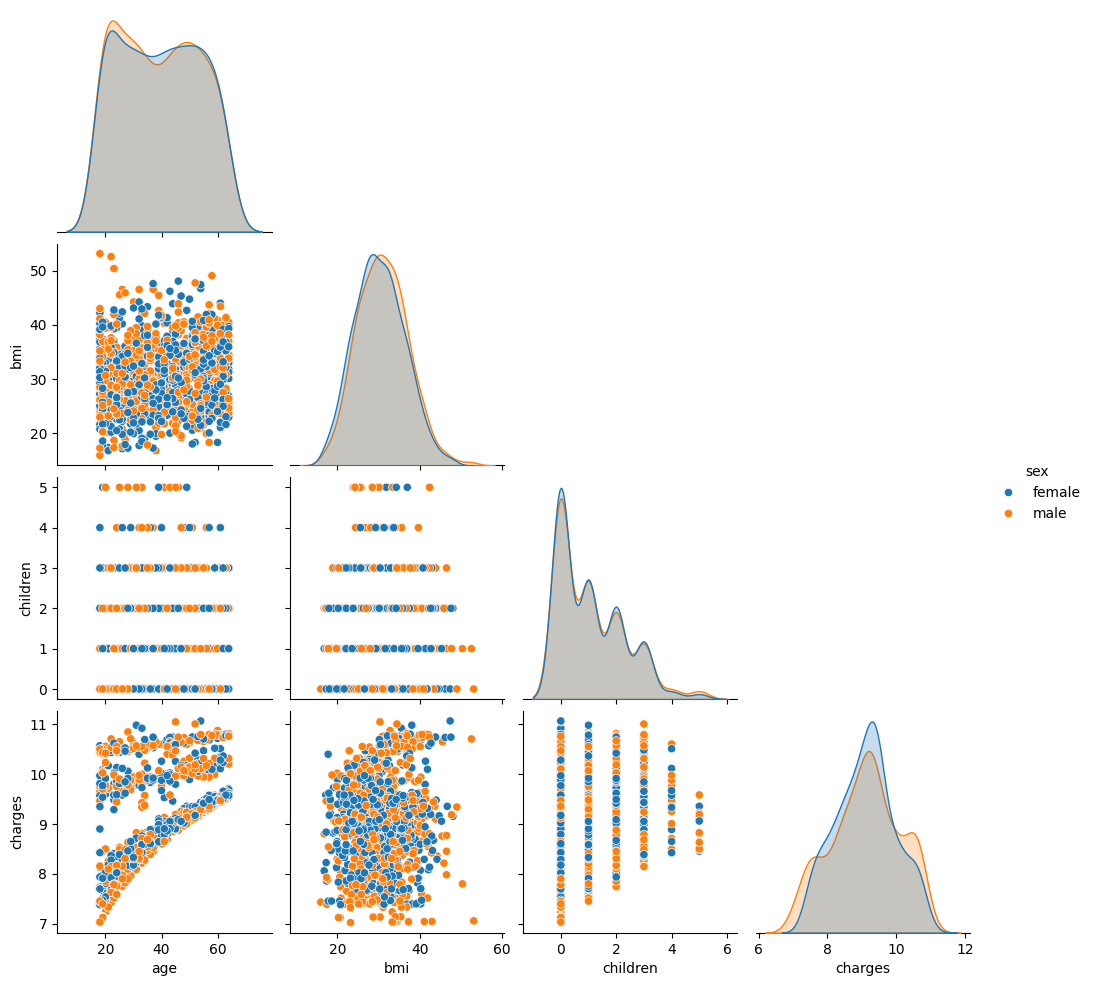

In [16]:
sns.pairplot(data=df_train, hue='sex', corner=True)
plt.show()

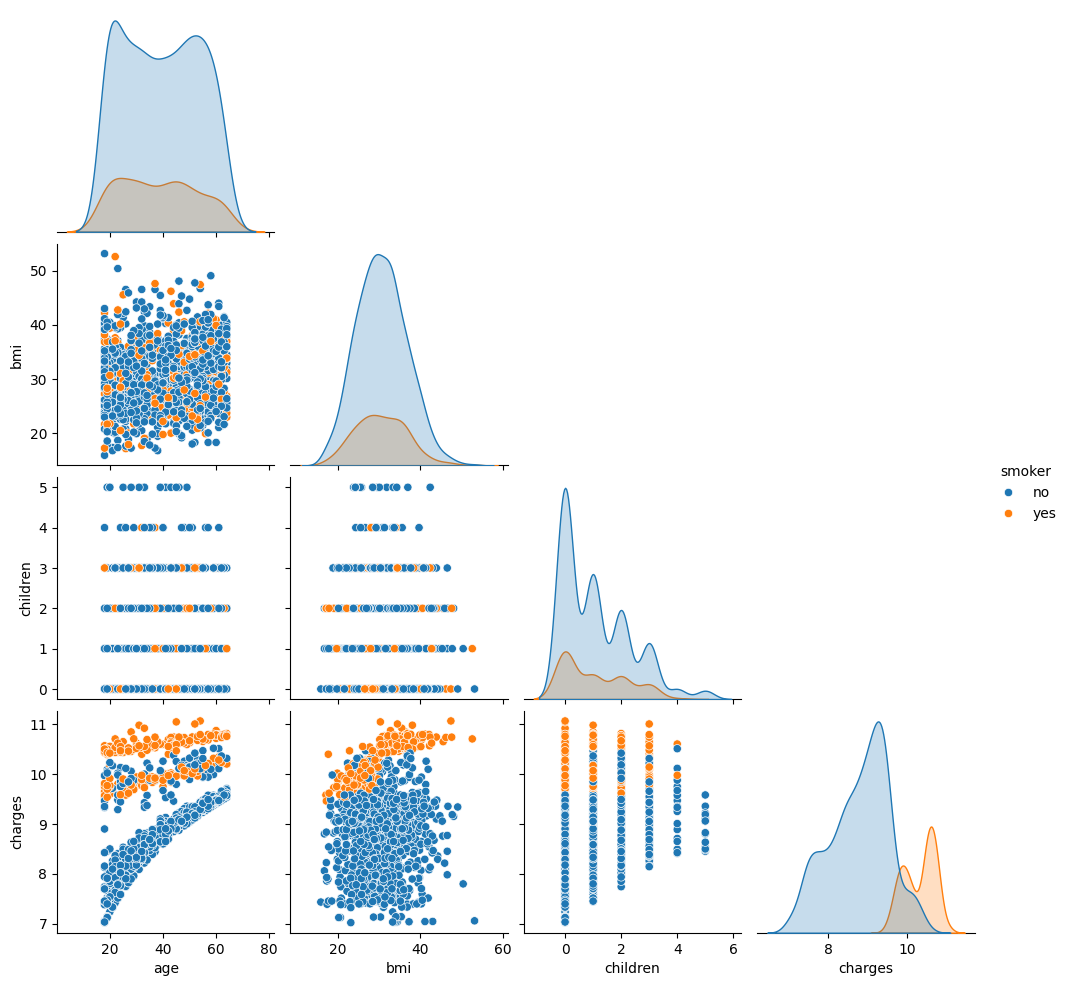

In [17]:
sns.pairplot(data=df_train, hue='smoker', corner=True)
plt.show()

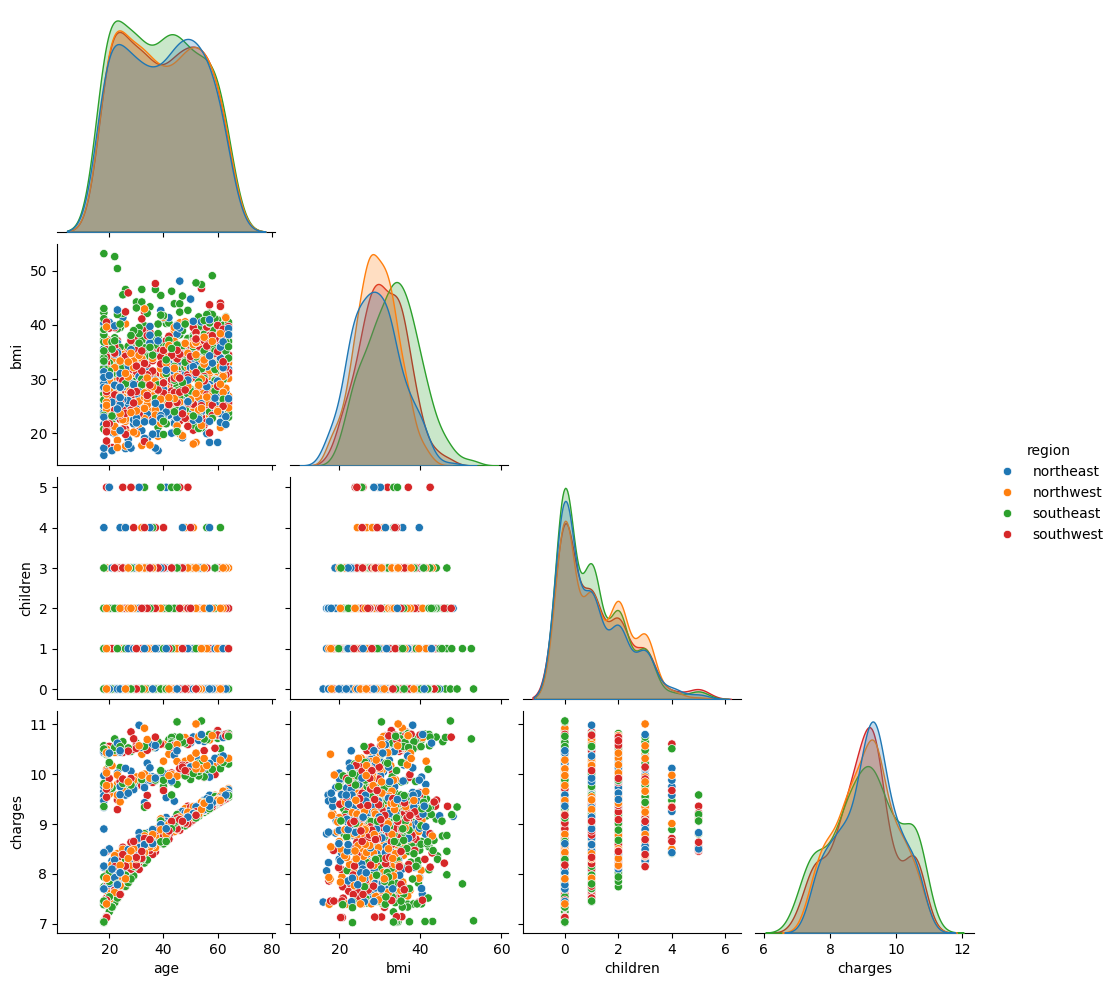

In [18]:
sns.pairplot(data=df_train, hue='region', corner=True)
plt.show()

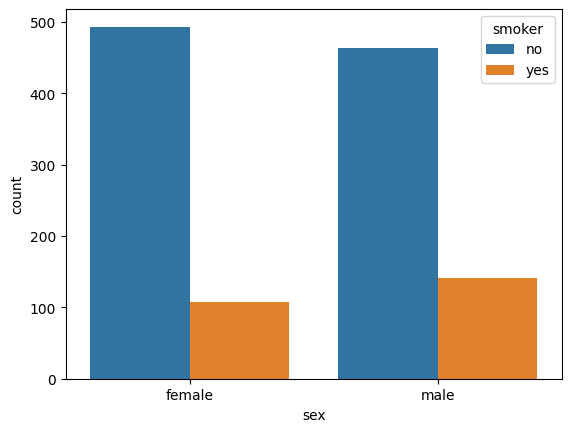

In [19]:
sns.countplot(df_train, x='sex', hue='smoker')
plt.show()

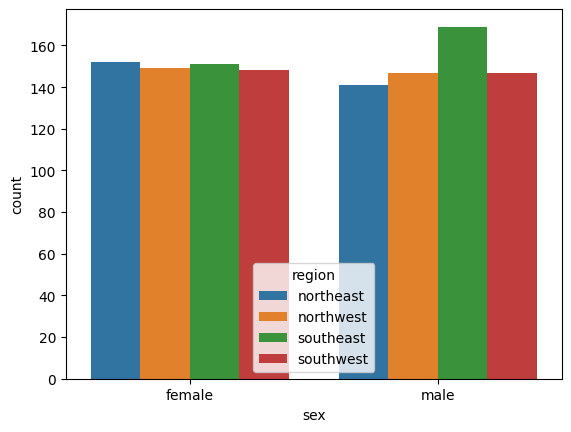

In [20]:
sns.countplot(df_train, x='sex', hue='region')
plt.show()

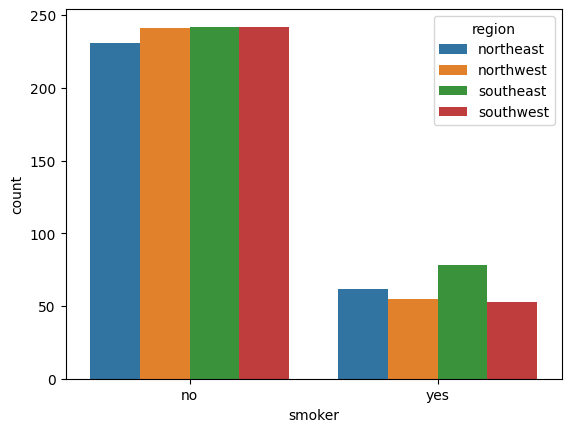

In [21]:
sns.countplot(df_train, x='smoker', hue='region')
plt.show()

In [22]:
X_train = df_train.drop(columns='charges')
y_train = df_train['charges']

X_test = df_test.drop(columns='charges')
y_test = df_test['charges']

In [24]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('category').columns

num_proc = Pipeline(steps=[
    ('scaler', MinMaxScaler()) #MinMaxScaler escala los valores de una columna entre 0 y 1
]) #Para valores razonablemente simétricos si puede aplicar el StandarScaler escalando los valores a un promedio cero y desviación estandar uno(1)
cat_proc = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])
processor = ColumnTransformer(transformers=[
    ('num', num_proc, num_cols),
    ('cat', cat_proc, cat_cols)
])
reg_lr = Pipeline(steps=[
    ('proce', processor),
    ('lreg', LinearRegression())
])

In [25]:
reg_lr.fit(X_train, y_train)
y_hat = reg_lr.predict(X_test)

In [28]:
print(f'MSE: {mean_squared_error(y_test, y_hat)}')
print(f'MAE: {mean_absolute_error(y_test, y_hat)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_hat))}')
#print(f'R2 (R SQUARE): {r2_score(y_test, y_hat)}') #Porcentaje de variabilidad explicada cuanto mas cerca al uno mejor

MSE: 0.15110080565237544
MAE: 0.24426678627676662
RMSE: 0.38871687081007356


In [29]:
my_value = pd.DataFrame({
    'age':[19],
    'sex':['male'],
    'bmi':[35.53],
    'children':[0],
    'smoker':['no'],
    'region':['northwest']})
reg_lr.predict(my_value)

array([8.033636])